In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
PARTICIPANT_DATA_PATH = "/cs/labs/michall/roeizucker/IIH/Participant_table.csv"
OLD_PHENOTYPE_FILE = '/cs/labs/michall/roeizucker/10krun/runs/48:59/ukbb_dataset.csv'
ALL_PARTICIPANT_DATA_WITH_DATES = "/cs/labs/michall/roeizucker/ukb_files/diagnosis.csv"
DIAGNOSES_FIELD_NAME = "Diagnoses - ICD10"
REQUIRED_FILEDS = ['Participant ID','Sex','Year of birth(participant - p34)',DIAGNOSES_FIELD_NAME]


In [3]:
df = pd.read_csv(PARTICIPANT_DATA_PATH)
old_df = pd.read_csv(OLD_PHENOTYPE_FILE)

In [4]:
eids = list(old_df["eid"])


In [5]:
filrered_df = df[df['Participant ID'].isin( eids)]
# used_eids = list(filrered_df["Participant ID"])
IIH_pap_eids = list(filrered_df["Participant ID"])

### Basic BMI parameters

In [6]:
IIH_only = filrered_df[filrered_df["Diagnoses - ICD10"].str.contains("G93.2")]
IIH_female = IIH_only[IIH_only["Sex"] == "Female"]
IIH_male = IIH_only[IIH_only["Sex"] == "Male"]

pap_only = filrered_df[filrered_df["Diagnoses - ICD10"].str.contains("H47.1")]
pap_female = pap_only[pap_only["Sex"] == "Female"]
pap_male = pap_only[pap_only["Sex"] == "Male"]

both_only = pap_only[pap_only["Diagnoses - ICD10"].str.contains("G93.2")]
both_female = both_only[both_only["Sex"] == "Female"]
both_male = both_only[both_only["Sex"] == "Male"]

print("pap BMI mean both sexes",pap_only["Body mass index (BMI) | Instance 0"].mean())
print("pap BMI mean female",pap_only[pap_only["Sex"] == "Female"]["Body mass index (BMI) | Instance 0"].mean())
print("pap BMI mean male",pap_only[pap_only["Sex"] == "Male"]["Body mass index (BMI) | Instance 0"].mean())
print("#"*40)
print("IIH BMI mean both sexes",IIH_only["Body mass index (BMI) | Instance 0"].mean())
print("IIH BMI mean female",IIH_only[IIH_only["Sex"] == "Female"]["Body mass index (BMI) | Instance 0"].mean())
print("IIH BMI mean male",IIH_only[IIH_only["Sex"] == "Male"]["Body mass index (BMI) | Instance 0"].mean())
# print("IIH BMI std female",IIH_only[IIH_only["Sex"] == "Female"]["Body mass index (BMI) | Instance 0"].std())
print("IIH BMI mean male",IIH_only[IIH_only["Sex"] == "Male"]["Body mass index (BMI) | Instance 0"].mean())
print("#"*40)
print("both BMI mean",both_only["Body mass index (BMI) | Instance 0"].mean())
print("both_female BMI mean",both_female["Body mass index (BMI) | Instance 0"].mean())
print("both_male BMI mean",both_male["Body mass index (BMI) | Instance 0"].mean())
print("#"*40)
print("pap BMI std both sexes",pap_only["Body mass index (BMI) | Instance 0"].std())
print("pap BMI std female",pap_only[pap_only["Sex"] == "Female"]["Body mass index (BMI) | Instance 0"].std())
print("pap BMI std male",pap_only[pap_only["Sex"] == "Male"]["Body mass index (BMI) | Instance 0"].std())
print("#"*40)
print("IIH BMI std both sexes",IIH_only["Body mass index (BMI) | Instance 0"].std())
print("IIH BMI std female",IIH_only[IIH_only["Sex"] == "Female"]["Body mass index (BMI) | Instance 0"].std())
print("IIH BMI std male",IIH_only[IIH_only["Sex"] == "Male"]["Body mass index (BMI) | Instance 0"].std())
print("#"*40)
print("both BMI std",both_only["Body mass index (BMI) | Instance 0"].std())
print("both_female BMI std",both_female["Body mass index (BMI) | Instance 0"].std())
print("both_male BMI std",both_male["Body mass index (BMI) | Instance 0"].std())


pap BMI mean both sexes 29.63616385542169
pap BMI mean female 29.77297708333333
pap BMI mean male 29.448534285714288
########################################
IIH BMI mean both sexes 31.146249523809526
IIH BMI mean female 32.24555970149253
IIH BMI mean male 29.20799210526316
IIH BMI mean male 29.20799210526316
########################################
both BMI mean 34.09825625
both_female BMI mean 33.608338461538466
both_male BMI mean 36.22123333333334
########################################
pap BMI std both sexes 5.539202142899025
pap BMI std female 5.5517245700596565
pap BMI std male 5.597369066799721
########################################
IIH BMI std both sexes 6.664295501273412
IIH BMI std female 7.059481512832093
IIH BMI std male 5.467377503929698
########################################
both BMI std 6.543667185604593
both_female BMI std 4.908994898235019
both_male BMI std 12.97061264564374


In [7]:
vals = []
with open ("/cs/labs/michall/roeizucker/IIH/GWAS/phenotypes/iih_mod.txt") as f:
    for row in f:
        if row[:-1].split()[2] == "1.0":
            vals.append(row[:-1].split()[1])
set1 = set(vals)
set2 = set(list(filrered_df["Participant ID"].astype(str)))
len(set2.intersection(set1))

168

In [8]:
male_df = filrered_df[filrered_df["Sex"] == "Male"]
female_df = filrered_df[filrered_df["Sex"] == "Female"]
num_of_males = len(male_df)
num_of_females = len(female_df)
print("num_of_males:",num_of_males,"num_of_females:",num_of_females)


num_of_males: 70 num_of_females: 103


In [36]:
# table:
# num of males/females
# BMI mean, standart diviation
dataframes = [(IIH_only,"IIH_both_sex"),(IIH_female,"IIH_female"),(IIH_male,"IIH_male"),
             (pap_only,"pap_both_sex"),(pap_female,"pap_female"),(pap_male,"pap_male"),
              (both_only,"both_both_sex"),(both_female,"both_female"),(both_male,"both_male"),
             (filrered_df,"any_disease_both_sexes"),(female_df,"any_disease_female"),(male_df,"any_disease_male_df")]


for frame,name in dataframes:
    bmi_mean = frame["Body mass index (BMI) | Instance 0"].mean()
    bmi_std = frame["Body mass index (BMI) | Instance 0"].std()
    print(name,"bmi_std:",bmi_std,"bmi_mean",bmi_mean)

# print(filrered_df["Smoking status | Instance 0"].value_counts()["Current"])
# percentile of smoking (current + past)
# for frame,name in dataframes:
#     dic = frame["Smoking status | Instance 0"].value_counts()
#     num_smoking = dic["Current"]
#     num_past = dic["Previous"]
#     percentile = (num_smoking + num_past) / len(frame)
#     print(name,"smoking percentile  (current + past)",percentile)
# age of diagnosis 
    # most common by phewas/ first two numbers of ICD10
# find number of family members 



IIH_both_sex bmi_std: 6.664295501273412 bmi_mean 31.146249523809526
IIH_female bmi_std: 7.059481512832093 bmi_mean 32.24555970149253
IIH_male bmi_std: 5.467377503929698 bmi_mean 29.20799210526316
pap_both_sex bmi_std: 5.539202142899025 bmi_mean 29.63616385542169
pap_female bmi_std: 5.5517245700596565 bmi_mean 29.77297708333333
pap_male bmi_std: 5.597369066799721 bmi_mean 29.448534285714288
both_both_sex bmi_std: 6.543667185604593 bmi_mean 34.09825625
both_female bmi_std: 4.908994898235019 bmi_mean 33.608338461538466
both_male bmi_std: 12.97061264564374 bmi_mean 36.22123333333334
any_disease_both_sexes bmi_std: 6.103075340898665 bmi_mean 30.142940116279075
any_disease_female bmi_std: 6.701221959898512 bmi_mean 30.908303921568628
any_disease_male_df bmi_std: 4.944576589526297 bmi_mean 29.027695714285713


## Age of diagnosis analysis

### only for IIH and pap

In [10]:
# age of diagnosis

diagnosis_df = pd.read_csv("/cs/labs/michall/roeizucker/IIH/diag_dates.csv") # load age of diagnosis table

diagnosis_df_filtered = diagnosis_df[diagnosis_df['Participant ID'].isin( IIH_pap_eids)] # filter to use only IIH and pap 
end = pd.to_datetime('2099-12-15')
diagnosis_df_filtered['G93.2 Benign intracranial hypertension_date'] = pd.to_datetime(diagnosis_df_filtered['G93.2 Benign intracranial hypertension_date']).fillna(end)
diagnosis_df_filtered['H47.1 Papilloedema, unspecified_date'] = pd.to_datetime(diagnosis_df_filtered['H47.1 Papilloedema, unspecified_date']).fillna(end)
# diagnosis_df_filtered["min_date = "]
diagnosis_df_filtered["min_date"] = diagnosis_df_filtered[["G93.2 Benign intracranial hypertension_date","H47.1 Papilloedema, unspecified_date"]].min(axis=1)
diagnosis_df_filtered["age_diagnosis"] = (diagnosis_df_filtered["min_date"] - pd.to_datetime(diagnosis_df_filtered["Year of birth(participant - p34)"])).dt.days / 365
diagnosis_df_filtered["age_diagnosis_IIH_only"] = (diagnosis_df_filtered["G93.2 Benign intracranial hypertension_date"] - pd.to_datetime(diagnosis_df_filtered["Year of birth(participant - p34)"])).dt.days / 365

/cs/usr/roeizucker/my_python/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/cs/usr/roeizucker/my_python/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/cs/usr/roeizucker/my_python/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [11]:
# diagnosis_df_filtered

In [12]:
# diagnosis_df = pd.read_csv("/cs/labs/michall/roeizucker/IIH/diag_dates.csv")
# end = pd.to_datetime('2099-12-15')
# diagnosis_df_filtered = diagnosis_df[diagnosis_df['Participant ID'].isin( IIH_pap_eids)]
# diagnosis_df_filtered['G93.2 Benign intracranial hypertension_date'] = pd.to_datetime(diagnosis_df_filtered['G93.2 Benign intracranial hypertension_date'])
# diagnosis_df_filtered['H47.1 Papilloedema, unspecified_date'] = pd.to_datetime(diagnosis_df_filtered['H47.1 Papilloedema, unspecified_date'])
# IIH_only_cur = diagnosis_df_filtered.dropna(subset=["G93.2 Benign intracranial hypertension_date"])
# pap_only_cur = diagnosis_df_filtered.dropna(subset=["H47.1 Papilloedema, unspecified_date"])
# both_only_cur = diagnosis_df_filtered.dropna(subset=["H47.1 Papilloedema, unspecified_date","G93.2 Benign intracranial hypertension_date"])

# # len(IIH_only[IIH_only["Sex"] == "Male"])
# # pap_only_male = 
# pap_only_male = pap_only_cur[pap_only_cur["Sex"] == "Male"]
# pap_only_female = pap_only_cur[pap_only_cur["Sex"] == "Female"]
# IIH_only_male = IIH_only_cur[IIH_only_cur["Sex"] == "Male"]
# IIH_only_female = IIH_only_cur[IIH_only_cur["Sex"] == "Female"]

# set(pap_only_male["Participant ID"]).intersection(set(IIH_only_male["Participant ID"]))
# len(set(pap_only_female["Participant ID"]).intersection(set(IIH_only_female["Participant ID"])))
# both_only["diff"] = both_only["G93.2 Benign intracranial hypertension_date"] - both_only["H47.1 Papilloedema, unspecified_date"]
# # both_only.to_csv("/cs/labs/michall/roeizucker/IIH/both_diseases_patiants_data.csv")
# both_only[["Sex","diff"]].to_csv("/cs/labs/michall/roeizucker/IIH/both_diseases_patiants_data.csv")
# pap_only

In [13]:
# end = pd.to_datetime('2099-12-15')
# # diagnosis_df_filtered["min_date = "]
# IIH_only["min_date"] = IIH_only[["G93.2 Benign intracranial hypertension_date"]].min(axis=1)
# IIH_only["age_diagnosis"] = (IIH_only["min_date"] - pd.to_datetime(IIH_only["Year of birth(participant - p34)"])).dt.days / 365
# IIH_only["age_diagnosis_IIH_only"] = (IIH_only["G93.2 Benign intracranial hypertension_date"] - pd.to_datetime(IIH_only["Year of birth(participant - p34)"])).dt.days / 365
# print("both", IIH_only["age_diagnosis"].mean())
# print("Male", IIH_only[IIH_only["Sex"] == "Male"]["age_diagnosis"].mean())
# print("female", IIH_only[IIH_only["Sex"] == "Female"]["age_diagnosis"].mean())


In [14]:
# end = pd.to_datetime('2099-12-15')
# # diagnosis_df_filtered["min_date = "]
# pap_only["min_date"] = pap_only[["G93.2 Benign intracranial hypertension_date"]].min(axis=1)
# pap_only["age_diagnosis"] = (pap_only["min_date"] - pd.to_datetime(IIH_only["Year of birth(participant - p34)"])).dt.days / 365
# pap_only["age_diagnosis_IIH_only"] = (pap_only["G93.2 Benign intracranial hypertension_date"] - pd.to_datetime(pap_only["Year of birth(participant - p34)"])).dt.days / 365
# print("both", pap_only["age_diagnosis"].mean())
# print("Male", pap_only[pap_only["Sex"] == "Male"]["age_diagnosis"].mean())
# print("female", pap_only[pap_only["Sex"] == "Female"]["age_diagnosis"].mean())


In [15]:
# diagnosis_df_filtered["min_date"] = diagnosis_df_filtered[["G93.2 Benign intracranial hypertension_date","H47.1 Papilloedema, unspecified_date"]].min(axis=1)
# diagnosis_df_filtered["age_diagnosis"] = (IIH_only["min_date"] - pd.to_datetime(IIH_only["Year of birth(participant - p34)"])).dt.days / 365

In [16]:
def check_BMI_diff(df1,df2,remove_both = True):
    cond1 =df1["Participant ID"].isin(df2["Participant ID"])
    cond2 =df2["Participant ID"].isin(df1["Participant ID"])
    rsv1 = df1[~cond1]["Body mass index (BMI) | Instance 0"].dropna()
    if remove_both:
        rsv2 = df2[~cond2]["Body mass index (BMI) | Instance 0"].dropna()
    else:
        rsv2 = df2["Body mass index (BMI) | Instance 0"].dropna()
    stats.ttest_ind(np.array(rsv1), np.array(rsv2))
    print(stats.mannwhitneyu(np.array(rsv1), np.array(rsv2)))
check_BMI_diff(IIH_female,pap_female)
check_BMI_diff(IIH_male,pap_male)
check_BMI_diff(filrered_df[filrered_df['Sex'] == "Female"],IIH_female,False)
check_BMI_diff(filrered_df[filrered_df['Sex'] == "Female"],pap_female,False)

check_BMI_diff(filrered_df[filrered_df['Sex'] == "Male"],IIH_male,False)
check_BMI_diff(filrered_df[filrered_df['Sex'] == "Male"],pap_male,False)
# np.array(rsv)
# len(pap_female[~cond_pap])


MannwhitneyuResult(statistic=1212.0, pvalue=0.025195659562474788)
MannwhitneyuResult(statistic=549.0, pvalue=0.8951422359059519)
MannwhitneyuResult(statistic=770.0, pvalue=0.004603809067617955)
MannwhitneyuResult(statistic=1495.0, pvalue=0.18325257793100225)
MannwhitneyuResult(statistic=604.0, pvalue=0.9670860853142642)
MannwhitneyuResult(statistic=581.0, pvalue=0.7157617889048815)


In [17]:
diagnosis_df
pd.read_csv(PARTICIPANT_DATA_PATH)

,Participant ID,Pack years of smoking | Instance 0,Smoking status | Instance 0,Smoking status | Instance 1,Smoking status | Instance 2,Smoking status | Instance 3,Body mass index (BMI) | Instance 0,Body mass index (BMI) | Instance 1,Body mass index (BMI) | Instance 2,Body mass index (BMI) | Instance 3,...,Diagnoses - ICD10,Operation code | Instance 0,Ethnic background | Instance 0,Ethnic background | Instance 1,Ethnic background | Instance 2,Standing height | Instance 0,Standing height | Instance 1,Standing height | Instance 2,Standing height | Instance 3,Sex
0,1000071,NaN,Never,NaN,NaN,NaN,26.6170,NaN,NaN,NaN,...,"[""A04.8 Other specified bacterial intestinal i...","[""nasal/sinus/nose surgery"",""varicose vein sur...","[""British""]",NaN,NaN,181.0,NaN,NaN,NaN,Male
1,1037502,51.000,Previous,NaN,NaN,NaN,23.6203,NaN,NaN,NaN,...,"[""A41.9 Septicaemia, unspecified"",""C18.2 Ascen...","[""nasal/sinus/nose surgery""]","[""British""]",NaN,NaN,177.0,NaN,NaN,NaN,Male
2,1057066,NaN,Never,NaN,NaN,NaN,27.9421,NaN,NaN,NaN,...,"[""E11.9 Without complications"",""E78.0 Pure hyp...","[""bone surgery/joint surgery"",""caesarean secti...","[""British""]",NaN,NaN,156.0,NaN,NaN,NaN,Female
3,1060354,28.000,Current,NaN,NaN,NaN,37.8150,NaN,NaN,NaN,...,"[""B96.8 Other specified bacterial agents as th...","[""knee replacement/revision"",""muscle/soft tiss...","[""British""]",NaN,NaN,159.0,NaN,NaN,NaN,Female
4,1066219,NaN,Never,NaN,NaN,NaN,30.5389,NaN,NaN,NaN,...,"[""B96.8 Other specified bacterial agents as th...","[""percutaneous/open kidney stone surgery/litho...","[""British""]",NaN,NaN,173.0,NaN,NaN,NaN,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5912096,NaN,Never,NaN,NaN,NaN,27.6318,NaN,NaN,NaN,...,"[""A04.7 Enterocolitis due to Clostridium diffi...","[""gallstones removed"",""pancreas surgery"",""skin...","[""British""]",NaN,NaN,146.0,NaN,NaN,NaN,Female
263,5924024,NaN,Previous,NaN,Current,NaN,33.8834,NaN,32.7179,NaN,...,"[""E66.9 Obesity, unspecified"",""G08 Intracrania...","[""caesarean section / caesarian section""]","[""Any other Black background""]",NaN,"[""White and Black African""]",152.5,NaN,151.0,NaN,Female
264,5925468,41.000,Current,NaN,NaN,NaN,32.5255,NaN,NaN,NaN,...,"[""F10.0 Acute intoxication"",""F10.1 Harmful use...","[""brain surgery"",""squint correction""]","[""British""]",NaN,NaN,168.0,NaN,NaN,NaN,Male
265,5931460,2.000,Previous,NaN,NaN,NaN,29.4925,NaN,NaN,NaN,...,"[""C71.1 Frontal lobe"",""C71.5 Cerebral ventricl...","[""thyroid surgery"",""tonsillectomy +/- adenoids""]","[""British""]",NaN,NaN,162.0,NaN,NaN,NaN,Female


female mean age of diagnosis 40.12009575741455
male mean age of diagnosis 43.12520547945205
both mean age of diagnosis 41.33603610737192


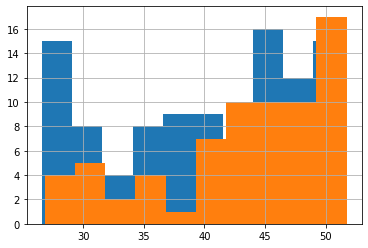

In [18]:
diagnosis_df_filtered_male = diagnosis_df_filtered.query("Sex == 'Male'")
diagnosis_df_filtered_female = diagnosis_df_filtered.query("Sex == 'Female'")

# pd.to_datetime(diagnosis_df_filtered["Year of birth(participant - p34)"])
# (diagnosis_df_filtered["min_date"] - pd.to_datetime(diagnosis_df_filtered["Year of birth(participant - p34)"])).dt.days / 365
# diagnosis_df_filtered["age_diagnosis"].hist()
print("female mean age of diagnosis",diagnosis_df_filtered_female["age_diagnosis"].mean())
print("male mean age of diagnosis",diagnosis_df_filtered_male["age_diagnosis"].mean())
print("both mean age of diagnosis",diagnosis_df_filtered["age_diagnosis"].mean())
diagnosis_df_filtered_female["age_diagnosis"].hist()
diagnosis_df_filtered_male["age_diagnosis"].hist()
plt.show()



# Comorbid Analysis

### create comorbid files

In [19]:
# most common ICD10
# TODO: add for different diseases with no less than 5 people 
# avarage number of diagnopsis for whites.
# location of diseases in row
# perform t-test/ u-test
def create_sorted_df_for_diags(frame,sep="\",\""):
        diag_dict = {}
        for val in list(frame["Diagnoses - ICD10"]):
            if type(val) == float:
                print(val)
            diags = (val.strip('][').split(sep))
            for diag in diags:
                
                diag = diag.replace("\"","")
                if diag not in diag_dict.keys():
                    diag_dict[diag] = 0
                diag_dict[diag]+=1

        sorted_list = (sorted((list(diag_dict.items())),key= lambda x: -x[1]))
        df = pd.DataFrame(sorted_list[:],columns=["disease_nane","number_of_patiants"]) 
        return df

def create_comorbid_file_for_frames(dataframes):
    for frame,name in dataframes:
        df = create_sorted_df_for_diags(frame)
           
        df.to_csv("comorbid_"+name + ".csv",index=False)
#     print("comorbid_"+name)
#     print(df)

### create comirbid files for all frames

In [20]:
create_comorbid_file_for_frames(dataframes[:2])

## Compare comirbid analysis

### create comorbid df for all participants

In [21]:
all_diag_df = pd.read_csv(ALL_PARTICIPANT_DATA_WITH_DATES,low_memory=False,usecols=REQUIRED_FILEDS)
euro_only_diag_df = all_diag_df[all_diag_df['Participant ID'].isin( eids)]
euro_only_diag_df = euro_only_diag_df.dropna(subset=["Diagnoses - ICD10"])
euro_fmale_diag_df = euro_only_diag_df[euro_only_diag_df["Sex"] == "Female"]
euro_male_diag_df = euro_only_diag_df[euro_only_diag_df["Sex"] == "Male"]

In [22]:
euro_comorbid_df = create_sorted_df_for_diags(euro_only_diag_df,sep="|")
euro_comorbid_female_df = create_sorted_df_for_diags(euro_fmale_diag_df,sep="|")
euro_comorbid_male_df = create_sorted_df_for_diags(euro_male_diag_df,sep="|")

### compare all euro to sub frames

In [23]:
def compare_disease_to_frame(disease_name,count_partial,dataframe,number_of_participants_partial,number_of_participants_all):
    print(disease_name)
    print(dataframe)
    print(dataframe[dataframe["disease_nane"] == disease_name])
    count_in_dataset = list(dataframe[dataframe["disease_nane"] == disease_name]["number_of_patiants"])[0]
    hyp = stats.hypergeom(M=number_of_participants_all,n=count_in_dataset, N=number_of_participants_partial)
    p_val = hyp.sf(count_partial - 1)
    return p_val

In [37]:

#     if p_val < 0.05:
#         print(disease_name,p_val)
#     print(count_in_dataset,count_partial,number_of_participants_partial,number_of_participants_all)
    

# list(map(lambda x:x[1],dataframes))
vals = []
for frame,name in dataframes:
#     print(name)
    comirbid_df = create_sorted_df_for_diags(frame)
    comirbid_df = comirbid_df[comirbid_df["number_of_patiants"] >=5]
    for row in comirbid_df.iterrows():
        disease_name = list(row[1])[0]
        disease_count = list(row[1])[1]
        if "both" in name:
            p_val = compare_disease_to_frame(disease_name,disease_count,euro_comorbid_df,len(frame),len(euro_only_diag_df))
        elif "female" in name:
            p_val = compare_disease_to_frame(disease_name,disease_count,euro_comorbid_female_df,len(frame),len(euro_fmale_diag_df))
        elif "male" in name:
            p_val = compare_disease_to_frame(disease_name,disease_count,euro_comorbid_male_df,len(frame),len(euro_male_diag_df))
        vals.append([name,disease_name,p_val,disease_count])

G93.2 Benign intracranial hypertension
                                            disease_nane  number_of_patiants
0                   I10 Essential (primary) hypertension               99058
1      Z86.4 Personal history of psychoactive substan...               48833
2                       E78.0 Pure hypercholesterolaemia               45648
3      K57.3 Diverticular disease of large intestine ...               38487
4      K44.9 Diaphragmatic hernia without obstruction...               35103
...                                                  ...                 ...
11481  B08.8 Other specified viral infections charact...                   1
11482                            K03.1 Abrasion of teeth                   1
11483    M05.17 Rheumatoid lung disease (Ankle and foot)                   1
11484                            X52.9 Unspecified place                   1
11485   M08.02 Juvenile rheumatoid arthritis (Upper arm)                   1

[11486 rows x 2 columns]
           

G91.9 Hydrocephalus, unspecified
                                            disease_nane  number_of_patiants
0                   I10 Essential (primary) hypertension               99058
1      Z86.4 Personal history of psychoactive substan...               48833
2                       E78.0 Pure hypercholesterolaemia               45648
3      K57.3 Diverticular disease of large intestine ...               38487
4      K44.9 Diaphragmatic hernia without obstruction...               35103
...                                                  ...                 ...
11481  B08.8 Other specified viral infections charact...                   1
11482                            K03.1 Abrasion of teeth                   1
11483    M05.17 Rheumatoid lung disease (Ankle and foot)                   1
11484                            X52.9 Unspecified place                   1
11485   M08.02 Juvenile rheumatoid arthritis (Upper arm)                   1

[11486 rows x 2 columns]
                 

                                            disease_nane  number_of_patiants
0                   I10 Essential (primary) hypertension               99058
1      Z86.4 Personal history of psychoactive substan...               48833
2                       E78.0 Pure hypercholesterolaemia               45648
3      K57.3 Diverticular disease of large intestine ...               38487
4      K44.9 Diaphragmatic hernia without obstruction...               35103
...                                                  ...                 ...
11481  B08.8 Other specified viral infections charact...                   1
11482                            K03.1 Abrasion of teeth                   1
11483    M05.17 Rheumatoid lung disease (Ankle and foot)                   1
11484                            X52.9 Unspecified place                   1
11485   M08.02 Juvenile rheumatoid arthritis (Upper arm)                   1

[11486 rows x 2 columns]
            disease_nane  number_of_patiants
165  

Z88.0 Personal history of allergy to penicillin
                                           disease_nane  number_of_patiants
0                  I10 Essential (primary) hypertension               45900
1     Z86.4 Personal history of psychoactive substan...               20332
2     K57.3 Diverticular disease of large intestine ...               20105
3     K44.9 Diaphragmatic hernia without obstruction...               19767
4                      E78.0 Pure hypercholesterolaemia               18623
...                                                 ...                 ...
9927  B08.8 Other specified viral infections charact...                   1
9928    M05.17 Rheumatoid lung disease (Ankle and foot)                   1
9929                            X52.9 Unspecified place                   1
9930   M08.02 Juvenile rheumatoid arthritis (Upper arm)                   1
9931  V89.3 Person injured in unspecified nonmotor-v...                   1

[9932 rows x 2 columns]
               

K80.2 Calculus of gallbladder without cholecystitis
                                           disease_nane  number_of_patiants
0                  I10 Essential (primary) hypertension               45900
1     Z86.4 Personal history of psychoactive substan...               20332
2     K57.3 Diverticular disease of large intestine ...               20105
3     K44.9 Diaphragmatic hernia without obstruction...               19767
4                      E78.0 Pure hypercholesterolaemia               18623
...                                                 ...                 ...
9927  B08.8 Other specified viral infections charact...                   1
9928    M05.17 Rheumatoid lung disease (Ankle and foot)                   1
9929                            X52.9 Unspecified place                   1
9930   M08.02 Juvenile rheumatoid arthritis (Upper arm)                   1
9931  V89.3 Person injured in unspecified nonmotor-v...                   1

[9932 rows x 2 columns]
           

F32.9 Depressive episode, unspecified
                                            disease_nane  number_of_patiants
0                   I10 Essential (primary) hypertension               99058
1      Z86.4 Personal history of psychoactive substan...               48833
2                       E78.0 Pure hypercholesterolaemia               45648
3      K57.3 Diverticular disease of large intestine ...               38487
4      K44.9 Diaphragmatic hernia without obstruction...               35103
...                                                  ...                 ...
11481  B08.8 Other specified viral infections charact...                   1
11482                            K03.1 Abrasion of teeth                   1
11483    M05.17 Rheumatoid lung disease (Ankle and foot)                   1
11484                            X52.9 Unspecified place                   1
11485   M08.02 Juvenile rheumatoid arthritis (Upper arm)                   1

[11486 rows x 2 columns]
            

                                            disease_nane  number_of_patiants
0                   I10 Essential (primary) hypertension               99058
1      Z86.4 Personal history of psychoactive substan...               48833
2                       E78.0 Pure hypercholesterolaemia               45648
3      K57.3 Diverticular disease of large intestine ...               38487
4      K44.9 Diaphragmatic hernia without obstruction...               35103
...                                                  ...                 ...
11481  B08.8 Other specified viral infections charact...                   1
11482                            K03.1 Abrasion of teeth                   1
11483    M05.17 Rheumatoid lung disease (Ankle and foot)                   1
11484                            X52.9 Unspecified place                   1
11485   M08.02 Juvenile rheumatoid arthritis (Upper arm)                   1

[11486 rows x 2 columns]
                              disease_nane  number

I25.8 Other forms of chronic ischaemic heart disease
                                            disease_nane  number_of_patiants
0                   I10 Essential (primary) hypertension               99058
1      Z86.4 Personal history of psychoactive substan...               48833
2                       E78.0 Pure hypercholesterolaemia               45648
3      K57.3 Diverticular disease of large intestine ...               38487
4      K44.9 Diaphragmatic hernia without obstruction...               35103
...                                                  ...                 ...
11481  B08.8 Other specified viral infections charact...                   1
11482                            K03.1 Abrasion of teeth                   1
11483    M05.17 Rheumatoid lung disease (Ankle and foot)                   1
11484                            X52.9 Unspecified place                   1
11485   M08.02 Juvenile rheumatoid arthritis (Upper arm)                   1

[11486 rows x 2 column

                                           disease_nane  number_of_patiants
0                  I10 Essential (primary) hypertension               45900
1     Z86.4 Personal history of psychoactive substan...               20332
2     K57.3 Diverticular disease of large intestine ...               20105
3     K44.9 Diaphragmatic hernia without obstruction...               19767
4                      E78.0 Pure hypercholesterolaemia               18623
...                                                 ...                 ...
9927  B08.8 Other specified viral infections charact...                   1
9928    M05.17 Rheumatoid lung disease (Ankle and foot)                   1
9929                            X52.9 Unspecified place                   1
9930   M08.02 Juvenile rheumatoid arthritis (Upper arm)                   1
9931  V89.3 Person injured in unspecified nonmotor-v...                   1

[9932 rows x 2 columns]
                                         disease_nane  number_o

R69 Unknown and unspecified causes of morbidity
                                           disease_nane  number_of_patiants
0                  I10 Essential (primary) hypertension               53158
1     Z86.4 Personal history of psychoactive substan...               28501
2                      E78.0 Pure hypercholesterolaemia               27025
3     K57.3 Diverticular disease of large intestine ...               18382
4                           N40 Hyperplasia of prostate               17624
...                                                 ...                 ...
9679                        M49.0 Tuberculosis of spine                   1
9680                             M71.0 Abscess of bursa                   1
9681                            K03.1 Abrasion of teeth                   1
9682  M08.40 Pauciarticular juvenile arthritis (Mult...                   1
9683                    K02.5 Caries with pulp exposure                   1

[9684 rows x 2 columns]
               

Z86.4 Personal history of psychoactive substance abuse
                                            disease_nane  number_of_patiants
0                   I10 Essential (primary) hypertension               99058
1      Z86.4 Personal history of psychoactive substan...               48833
2                       E78.0 Pure hypercholesterolaemia               45648
3      K57.3 Diverticular disease of large intestine ...               38487
4      K44.9 Diaphragmatic hernia without obstruction...               35103
...                                                  ...                 ...
11481  B08.8 Other specified viral infections charact...                   1
11482                            K03.1 Abrasion of teeth                   1
11483    M05.17 Rheumatoid lung disease (Ankle and foot)                   1
11484                            X52.9 Unspecified place                   1
11485   M08.02 Juvenile rheumatoid arthritis (Upper arm)                   1

[11486 rows x 2 colu

I25.9 Chronic ischaemic heart disease, unspecified
                                            disease_nane  number_of_patiants
0                   I10 Essential (primary) hypertension               99058
1      Z86.4 Personal history of psychoactive substan...               48833
2                       E78.0 Pure hypercholesterolaemia               45648
3      K57.3 Diverticular disease of large intestine ...               38487
4      K44.9 Diaphragmatic hernia without obstruction...               35103
...                                                  ...                 ...
11481  B08.8 Other specified viral infections charact...                   1
11482                            K03.1 Abrasion of teeth                   1
11483    M05.17 Rheumatoid lung disease (Ankle and foot)                   1
11484                            X52.9 Unspecified place                   1
11485   M08.02 Juvenile rheumatoid arthritis (Upper arm)                   1

[11486 rows x 2 columns]

R10.3 Pain localised to other parts of lower abdomen
                                            disease_nane  number_of_patiants
0                   I10 Essential (primary) hypertension               99058
1      Z86.4 Personal history of psychoactive substan...               48833
2                       E78.0 Pure hypercholesterolaemia               45648
3      K57.3 Diverticular disease of large intestine ...               38487
4      K44.9 Diaphragmatic hernia without obstruction...               35103
...                                                  ...                 ...
11481  B08.8 Other specified viral infections charact...                   1
11482                            K03.1 Abrasion of teeth                   1
11483    M05.17 Rheumatoid lung disease (Ankle and foot)                   1
11484                            X52.9 Unspecified place                   1
11485   M08.02 Juvenile rheumatoid arthritis (Upper arm)                   1

[11486 rows x 2 column

[11486 rows x 2 columns]
            disease_nane  number_of_patiants
191  D70 Agranulocytosis                4609
H91.9 Hearing loss, unspecified
                                            disease_nane  number_of_patiants
0                   I10 Essential (primary) hypertension               99058
1      Z86.4 Personal history of psychoactive substan...               48833
2                       E78.0 Pure hypercholesterolaemia               45648
3      K57.3 Diverticular disease of large intestine ...               38487
4      K44.9 Diaphragmatic hernia without obstruction...               35103
...                                                  ...                 ...
11481  B08.8 Other specified viral infections charact...                   1
11482                            K03.1 Abrasion of teeth                   1
11483    M05.17 Rheumatoid lung disease (Ankle and foot)                   1
11484                            X52.9 Unspecified place                   1
11485 

248  I35.0 Aortic (valve) stenosis                3594
M06.9 Rheumatoid arthritis, unspecified
                                            disease_nane  number_of_patiants
0                   I10 Essential (primary) hypertension               99058
1      Z86.4 Personal history of psychoactive substan...               48833
2                       E78.0 Pure hypercholesterolaemia               45648
3      K57.3 Diverticular disease of large intestine ...               38487
4      K44.9 Diaphragmatic hernia without obstruction...               35103
...                                                  ...                 ...
11481  B08.8 Other specified viral infections charact...                   1
11482                            K03.1 Abrasion of teeth                   1
11483    M05.17 Rheumatoid lung disease (Ankle and foot)                   1
11484                            X52.9 Unspecified place                   1
11485   M08.02 Juvenile rheumatoid arthritis (Upper arm)  

[11486 rows x 2 columns]
                                          disease_nane  number_of_patiants
473  R41.8 Other and unspecified symptoms and signs...                1680
R39.8 Other and unspecified symptoms and signs involving the urinary system
                                            disease_nane  number_of_patiants
0                   I10 Essential (primary) hypertension               99058
1      Z86.4 Personal history of psychoactive substan...               48833
2                       E78.0 Pure hypercholesterolaemia               45648
3      K57.3 Diverticular disease of large intestine ...               38487
4      K44.9 Diaphragmatic hernia without obstruction...               35103
...                                                  ...                 ...
11481  B08.8 Other specified viral infections charact...                   1
11482                            K03.1 Abrasion of teeth                   1
11483    M05.17 Rheumatoid lung disease (Ankle and foot)

G91.9 Hydrocephalus, unspecified
                                           disease_nane  number_of_patiants
0                  I10 Essential (primary) hypertension               45900
1     Z86.4 Personal history of psychoactive substan...               20332
2     K57.3 Diverticular disease of large intestine ...               20105
3     K44.9 Diaphragmatic hernia without obstruction...               19767
4                      E78.0 Pure hypercholesterolaemia               18623
...                                                 ...                 ...
9927  B08.8 Other specified viral infections charact...                   1
9928    M05.17 Rheumatoid lung disease (Ankle and foot)                   1
9929                            X52.9 Unspecified place                   1
9930   M08.02 Juvenile rheumatoid arthritis (Upper arm)                   1
9931  V89.3 Person injured in unspecified nonmotor-v...                   1

[9932 rows x 2 columns]
                          dise

[9932 rows x 2 columns]
                                           disease_nane  number_of_patiants
3574  T85.0 Mechanical complication of ventricular i...                  26
Z95.8 Presence of other cardiac and vascular implants and grafts
                                           disease_nane  number_of_patiants
0                  I10 Essential (primary) hypertension               45900
1     Z86.4 Personal history of psychoactive substan...               20332
2     K57.3 Diverticular disease of large intestine ...               20105
3     K44.9 Diaphragmatic hernia without obstruction...               19767
4                      E78.0 Pure hypercholesterolaemia               18623
...                                                 ...                 ...
9927  B08.8 Other specified viral infections charact...                   1
9928    M05.17 Rheumatoid lung disease (Ankle and foot)                   1
9929                            X52.9 Unspecified place                   1

                                           disease_nane  number_of_patiants
0                  I10 Essential (primary) hypertension               53158
1     Z86.4 Personal history of psychoactive substan...               28501
2                      E78.0 Pure hypercholesterolaemia               27025
3     K57.3 Diverticular disease of large intestine ...               18382
4                           N40 Hyperplasia of prostate               17624
...                                                 ...                 ...
9679                        M49.0 Tuberculosis of spine                   1
9680                             M71.0 Abscess of bursa                   1
9681                            K03.1 Abrasion of teeth                   1
9682  M08.40 Pauciarticular juvenile arthritis (Mult...                   1
9683                    K02.5 Caries with pulp exposure                   1

[9684 rows x 2 columns]
                          disease_nane  number_of_patiants
50  

In [38]:
df = pd.DataFrame(vals,columns=["group","disease_name","p_value","disease_count"])
df.to_csv("comorbid_hypergeo_analysis.csv",index=False)

In [34]:
euro_comorbid_df[euro_comorbid_df["disease_nane"] == "H47.1 Papilloedema, unspecified"]

,disease_nane,number_of_patiants
3014,"H47.1 Papilloedema, unspecified",84


In [27]:
# H47.1 Papilloedema, unspecified
comirbid_df = create_sorted_df_for_diags(pap_only)
# compare_disease_to_frame("H47.1 Papilloedema, unspecified",84,euro_comorbid_df,84,len(euro_only_diag_df))
comirbid_df

,disease_nane,number_of_patiants
0,"H47.1 Papilloedema, unspecified",84
1,I10 Essential (primary) hypertension,49
2,R51 Headache,25
3,Z86.4 Personal history of psychoactive substan...,25
4,E78.0 Pure hypercholesterolaemia,21
...,...,...
980,X65.9 Unspecified place,1
981,C71.5 Cerebral ventricle,1
982,M15.0 Primary generalised (osteo)arthrosis,1
983,Z74.0 Reduced mobility,1


In [45]:
df[(df["group"] =="IIH_both_sex") & (df["disease_name"] == "H47.1 Papilloedema, unspecified")]

,group,disease_name,p_value,disease_count
20,IIH_both_sex,"H47.1 Papilloedema, unspecified",1.470974e-39,16


# Basic Graphs

Pack years of smoking | Instance 0


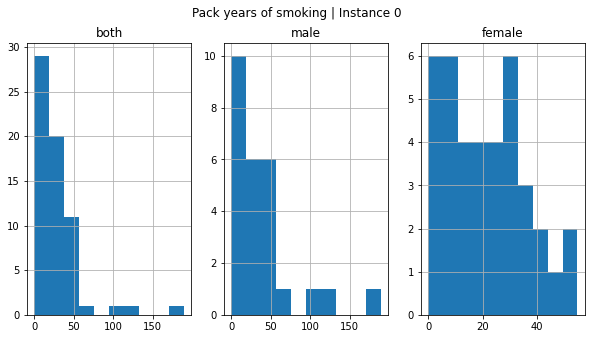

Smoking status | Instance 0


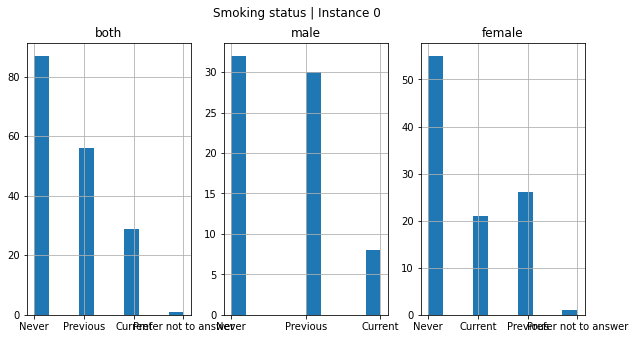

Body mass index (BMI) | Instance 0


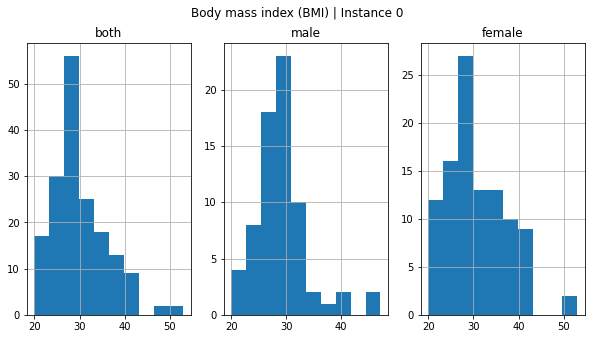

Weight | Instance 0


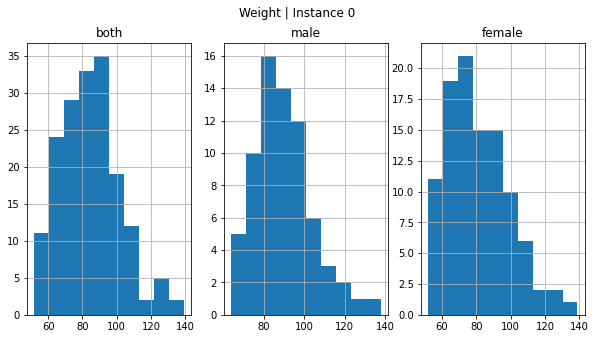

Ethnic background | Instance 0


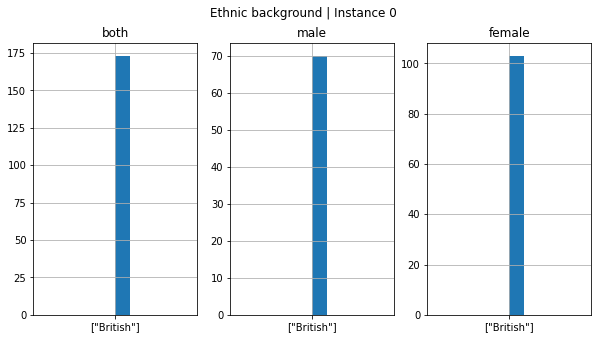

Standing height | Instance 0


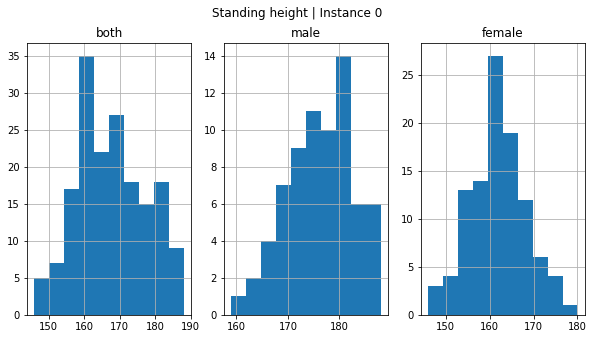

Sex


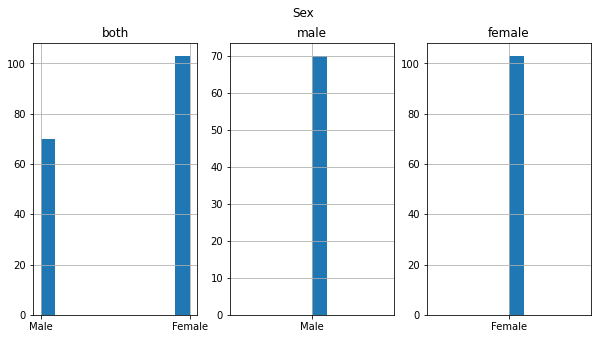

In [29]:

for col in list(filrered_df):
    if col == "Participant ID" or "Operation code" in col or "Diagnoses" in col:
        continue
    if "Instance" not in col or "Instance 0" in col:
        print(col)
#         plt.title(col)
        fig, axs = plt.subplots(1, 3,figsize=(10, 5))
        fig.suptitle(col)
        filrered_df[col].hist(ax=axs[0])
        axs[0].set_title("both")
#         plt.show()
        male_df[col].hist(ax=axs[1])
        axs[1].set_title("male")
#         plt.show()
        female_df[col].hist(ax=axs[2])
        axs[2].set_title("female")
        plt.show()
        
        
        
        